# LLM Assignment - By Antara Raman Sahay
Devised a solution to extract information from non-structured data images like tables, graphs etc using FUYU-8B

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q bitsandbytes accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 32.4 MB/s eta 0:00:00


In [ ]:
import requests
from transformers import FuyuForCausalLM, AutoProcessor, BitsAndBytesConfig
from PIL import Image
import torch

model_id="ybelkada/fuyu-8b-sharded"
processor = AutoProcessor.from_pretrained(model_id)

In [ ]:

quantization_config= BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

model = FuyuForCausalLM.from_pretrained(model_id, quantization_config=quantization_config)


Loading checkpoint shards:   0%|          | 0/11 [00:00<?, ?it/s]

Processing of bar graph

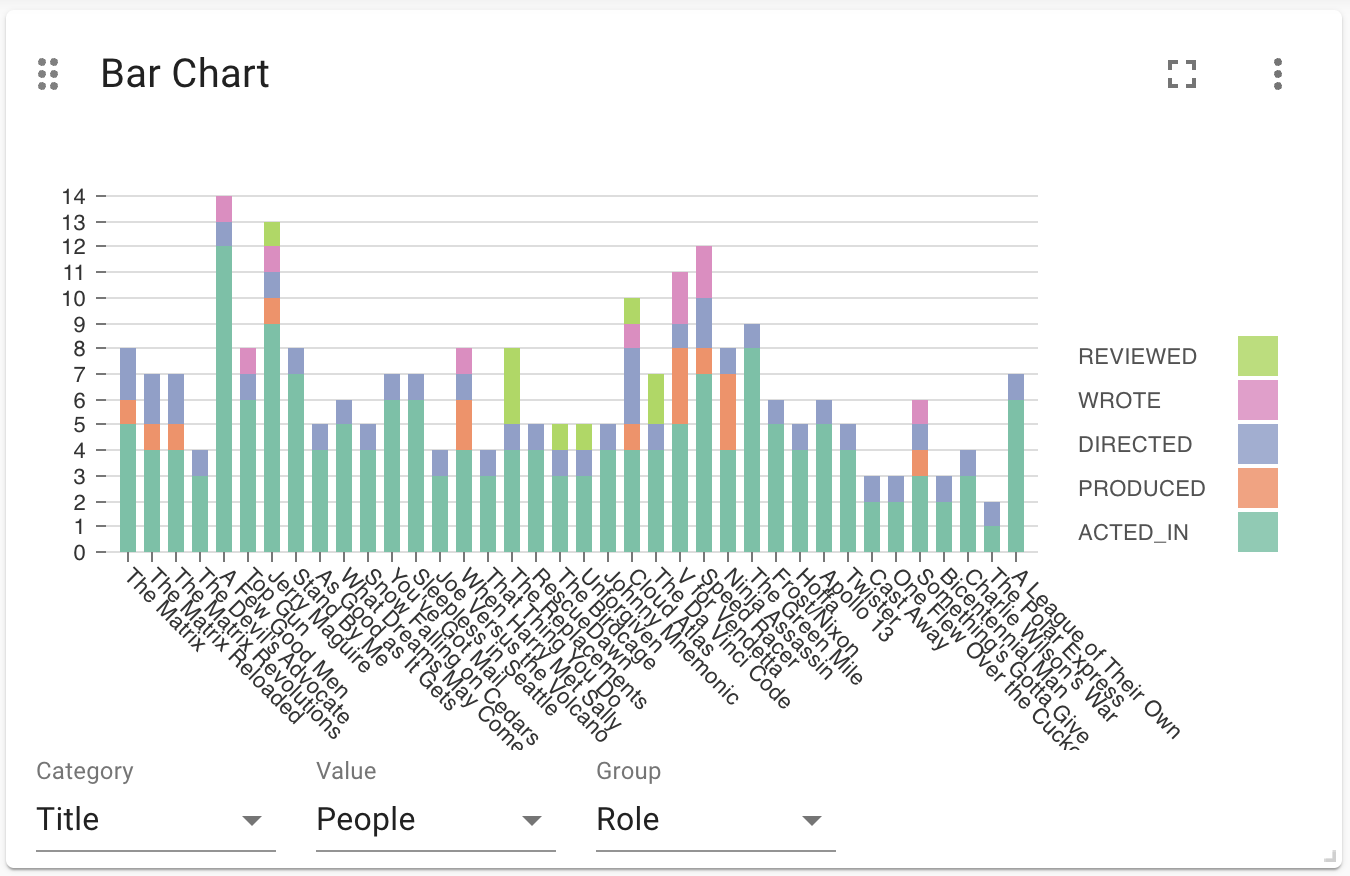

In [ ]:
import requests
img_url = 'https://neo4j.com/labs/neodash/2.1/_images/barstacked.png'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
raw_image

In [ ]:
text_prompt="Act as data analyst and Generate deep insights from the given bar graph.\n"

In [ ]:
model_inputs = processor(text=text_prompt, images=raw_image)
for k, v in model_inputs.items():
  if v.dtype != torch.long:
    v = v.to(torch.float16)
  model_inputs[k] = v.to("cuda")

  generation_output = model.generate(**model_inputs, max_new_tokens=50)
  generation_text = processor.batch_decode(generation_output[:, -50:], skip_special_tokens=True)
  print(generation_text)

Setting `pad_token_id` to `eos_token_id`:71013 for open-end generation.


['|SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||NEWLINE|<s> Act as data analyst and Generate deep insights from the given bar graph.\n\x04 What percentage of the bar graph is "Group"?\n\n1']


AttributeError: ignored

In [ ]:
for k,v in model_inputs.items():
  print(k,v)

input_ids tensor([[71011, 71011, 71011,  ..., 71375, 71128, 71122]], device='cuda:0')
image_patches [tensor([[[ 0.9059,  0.9059,  0.9059,  ...,  1.0000,  1.0000,  1.0000],
         [ 0.9059,  0.9059,  0.9059,  ...,  1.0000,  1.0000,  1.0000],
         [ 0.9059,  0.9059,  0.9059,  ...,  1.0000,  1.0000,  1.0000],
         ...,
         [ 0.6784,  0.6784,  0.6784,  ..., -0.9922, -0.9922, -0.9922],
         [ 0.6784,  0.6784,  0.6784,  ..., -0.9922, -0.9922, -0.9922],
         [ 0.6784,  0.6784,  0.6784,  ..., -0.9922, -0.9922, -0.9922]]])]
image_patches_indices tensor([[ 0,  1,  2,  ..., -1, -1, -1]])
attention_mask tensor([[1, 1, 1,  ..., 1, 1, 1]])


For processing of table

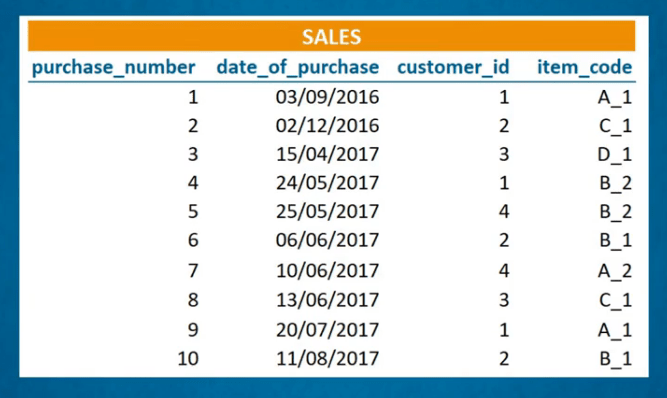

In [ ]:
import requests
img_url = 'https://365datascience.com/resources/blog/2018-07-image1-min-6.png'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
raw_image

In [ ]:
text_prompt="What does this table depict.\n"

In [ ]:
model_inputs = processor(text=text_prompt, images=raw_image)
for k, v in model_inputs.items():
  if v.dtype != torch.long:
    v = v.to(torch.float16)
  model_inputs[k] = v.to("cuda")

  generation_output = model.generate(**model_inputs, max_new_tokens=50)
  generation_text = processor.batch_decode(generation_output[:, -50:], skip_special_tokens=True)
  print(generation_text)

Setting `pad_token_id` to `eos_token_id`:71013 for open-end generation.


['|SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||SPEAKER||NEWLINE|<s> What does this table depict.\n\x04 The table displays sales data for various products, including purchase number, date of purchase, customer id, and item code.\n']


AttributeError: ignored

Line Graph

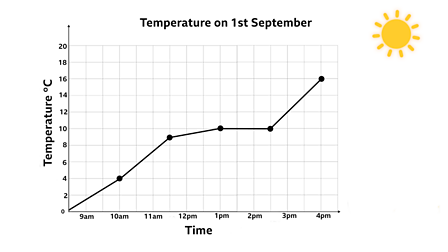

In [ ]:
import requests
img_url = 'https://ichef.bbci.co.uk/images/ic/448xn/p09xd6t1.png'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
raw_image

In [ ]:
text_prompt="What does this table depict.\n"

In [ ]:
model_inputs = processor(text=text_prompt, images=raw_image)
for k, v in model_inputs.items():
  if v.dtype != torch.long:
    v = v.to(torch.float16)
  model_inputs[k] = v.to("cuda")

  generation_output = model.generate(**model_inputs, max_new_tokens=50)
  generation_text = processor.batch_decode(generation_output[:, -50:], skip_special_tokens=True)
  print(generation_text)

Setting `pad_token_id` to `eos_token_id`:71013 for open-end generation.


['depict.\n\x04 The table depicts the temperature data over time. It shows an average temperature curve with a steep line going upward. The graph shows an average temperature of 18.5 degrees Celsius for 1st September to 3rd October.\n']


AttributeError: ignored

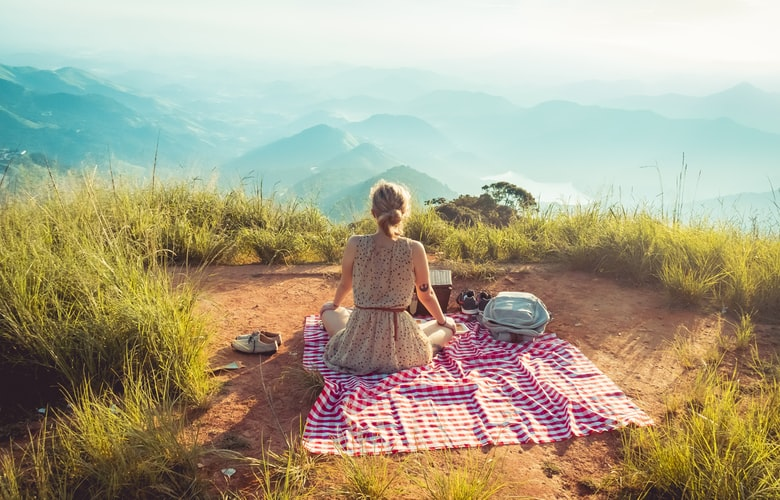

In [ ]:
import requests
img_url = 'https://cdn.fs.teachablecdn.com/Pmr1Fu4MThK2Puhb3Aed'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
raw_image

In [ ]:
text_prompt="What does this photograph depict.\n"

In [ ]:
model_inputs = processor(text=text_prompt, images=raw_image)
for k, v in model_inputs.items():
  if v.dtype != torch.long:
    v = v.to(torch.float16)
  model_inputs[k] = v.to("cuda")

  generation_output = model.generate(**model_inputs, max_new_tokens=50)
  generation_text = processor.batch_decode(generation_output[:, -50:], skip_special_tokens=True)
  print(generation_text)

Setting `pad_token_id` to `eos_token_id`:71013 for open-end generation.


['What does this photograph depict.\n\x04 The photograph depicts a woman sitting on top of a blanket, surrounded by nature. She is surrounded by grass, trees, and a mountain range, creating a picturesque and serene scene. The woman appears to be enjoying her outdoor picnic, surrounded by the beauty of nature.']


AttributeError: ignored